In [5]:
#different challenges
import matplotlib.pyplot as plt

# Function to read the evaluation results from a file
def read_results(file_path, file):
    results = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()
            challenge_name = parts[0]
            
            # Skip 'ChallengeFree'
            if challenge_name == 'ChallengeFree':
                continue
            
            prec1 = float(parts[1])
            noise_level = int(challenge_name.split('-')[-1])
            
            if challenge_name.split('-')[0] not in results:
                results[challenge_name.split('-')[0]] = {'noise_level': [], 'prec1': []}
            
            results[challenge_name.split('-')[0]]['noise_level'].append(noise_level)
            results[challenge_name.split('-')[0]]['prec1'].append(prec1)
    
    return results

# Read results from both files
noisy_results = read_results('evaluation_results_unreal_test_noisy_2.txt','noisy')
denoised_results = read_results('evaluation_results_unreal_test_denoised_2.txt','denoised')
denoised_results_2 = read_results('evaluation_results_unreal_test_denoised_bm3d.txt','denoised')

# Sort the lists for each challenge based on noise_level
for challenge, values in noisy_results.items():
    sorted_data = sorted(zip(values['noise_level'], values['prec1']), key=lambda x: x[0])
    values['noise_level'], values['prec1'] = zip(*sorted_data)

for challenge, values in denoised_results.items():
    sorted_data = sorted(zip(values['noise_level'], values['prec1']), key=lambda x: x[0])
    values['noise_level'], values['prec1'] = zip(*sorted_data)
    
for challenge, values in denoised_results_2.items():
    sorted_data = sorted(zip(values['noise_level'], values['prec1']), key=lambda x: x[0])
    values['noise_level'], values['prec1'] = zip(*sorted_data)

# Plotting
challenge_names = list(noisy_results.keys())

for challenge_name in challenge_names:
    plt.figure()
    
    # Plot for Noisy
    plt.plot(noisy_results[challenge_name]['noise_level'], noisy_results[challenge_name]['prec1'],'o-', label='Prec@1 Noisy')
    
    # Plot for Denoised
    plt.plot(denoised_results[challenge_name]['noise_level'], denoised_results[challenge_name]['prec1'],'o-', label='Prec@1 Denoised (FFDNet)')
    
    # Plot for Denoised
    plt.plot(denoised_results_2[challenge_name]['noise_level'], denoised_results_2[challenge_name]['prec1'],'o-', label='Prec@1 Denoised (BM3D)')
    
    plt.title(f'{challenge_name} - Prec@1 Noisy vs Denoised')
    plt.xlabel('Noise Level')
    plt.ylabel('Prec@1')
    
    plt.xticks(range(1, 6))
    plt.legend()
    
    # Save the image with the title as the filename
    plt.savefig(f'cure_tsr_accuracy_combined_plots\\{challenge_name}.png')
    
    plt.close()  # Close the figure to avoid displaying it in the script

print("Plots saved successfully.")

Plots saved successfully.


In [47]:
#all challenges
import matplotlib.pyplot as plt
import numpy as np

# Function to read the evaluation results from a file
def read_results(file_path, file):
    results = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()
            challenge_name = parts[0]
            
            # Skip 'ChallengeFree'
            if challenge_name == 'ChallengeFree':
                continue
            
            prec1 = float(parts[1])
            noise_level = int(challenge_name.split('-')[-1])
            
            if challenge_name.split('-')[0] not in results:
                results[challenge_name.split('-')[0]] = {'noise_level': [], 'prec1': []}
            
            results[challenge_name.split('-')[0]]['noise_level'].append(noise_level)
            results[challenge_name.split('-')[0]]['prec1'].append(prec1)
    
    return results

# Read results from both files
noisy_results = read_results('evaluation_results_unreal_test_noisy_2.txt','noisy')
denoised_results = read_results('evaluation_results_unreal_test_denoised_2.txt','denoised')
denoised_results_2 = read_results('evaluation_results_unreal_test_denoised_bm3d.txt','denoised')

# Sort the lists for each challenge based on noise_level
for challenge, values in noisy_results.items():
    sorted_data = sorted(zip(values['noise_level'], values['prec1']), key=lambda x: x[0])
    values['noise_level'], values['prec1'] = zip(*sorted_data)

for challenge, values in denoised_results.items():
    sorted_data = sorted(zip(values['noise_level'], values['prec1']), key=lambda x: x[0])
    values['noise_level'], values['prec1'] = zip(*sorted_data)
    
for challenge, values in denoised_results_2.items():
    sorted_data = sorted(zip(values['noise_level'], values['prec1']), key=lambda x: x[0])
    values['noise_level'], values['prec1'] = zip(*sorted_data)

# Plotting
challenge_names = list(noisy_results.keys())

noisy_results_avg = np.zeros(5)
denoised_results_avg = np.zeros(5)
denoised_results_2_avg = np.zeros(5)

for challenge_name in challenge_names:
    if challenge_name == 'Decolorization':
        continue
    
    # Plot for Noisy
    noisy_results_avg += np.array(noisy_results[challenge_name]['prec1'])
    denoised_results_avg += np.array(denoised_results[challenge_name]['prec1'])
    denoised_results_2_avg += np.array(denoised_results_2[challenge_name]['prec1'])
    
noisy_results_avg /= 11
denoised_results_avg /= 11
denoised_results_2_avg /= 11

plt.figure()
plt.plot([1,2,3,4,5], noisy_results_avg,'o-', label='Prec@1 Noisy') 
plt.plot([1,2,3,4,5], denoised_results_avg,'o-', label='Prec@1 Denoised (FFDNet)')
plt.plot([1,2,3,4,5], denoised_results_2_avg,'o-', label='Prec@1 Denoised (BM3D)')
    
plt.title(f'All Challenges - Prec@1 Noisy vs Denoised')
plt.xlabel('Noise Level')
plt.ylabel('Prec@1')
    
plt.xticks(range(1, 6))
plt.legend()
    
# Save the image with the title as the filename
plt.savefig(f'cure_tsr_accuracy_combined_plots\\all_challenges.png')
    
plt.close()  # Close the figure to avoid displaying it in the script

print("Plot saved successfully.")

Plot saved successfully.


In [7]:
def read_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    return lines

def write_averages(averages, output_file):
    with open(output_file, 'w') as file:
        for challenge, avg in averages.items():
            file.write(f"{challenge} {avg[0]:.6f} {avg[1]:.6f}\n")

def calculate_average(file1_lines, file2_lines):
    averages = {}

    # Extract unique challenge names from both files
    all_challenge_names = set()
    for line in file1_lines + file2_lines:
        challenge_name = line.split()[0]
        all_challenge_names.add(challenge_name)

    # Calculate averages for each challenge
    for challenge_name in all_challenge_names:
        values_file1 = find_values(file1_lines, challenge_name)
        values_file2 = find_values(file2_lines, challenge_name)

        if values_file1 and values_file2:
            # Calculate the average for each column
            average_values = (
                (values_file1[0] + values_file2[0]) / 2,
                (values_file1[1] + values_file2[1]) / 2
            )
            averages[challenge_name] = average_values
        elif values_file1:
            # If only in file1, use values from file1
            averages[challenge_name] = values_file1
        elif values_file2:
            # If only in file2, use values from file2
            averages[challenge_name] = values_file2

    return averages

def find_values(lines, challenge_name):
    for line in lines:
        if line.startswith(challenge_name):
            tokens = line.split()
            return float(tokens[1]), float(tokens[2])
    return None

if __name__ == "__main__":
    file1_path = "D:\\jupyter_notebooks\\ECE6258_Project\\evaluation_results_cure_tsr\\evaluation_results_real_test_noisy_2.txt"
    file2_path = "D:\\jupyter_notebooks\\ECE6258_Project\\evaluation_results_cure_tsr\\evaluation_results_unreal_test_noisy_2.txt"
    output_file_path = "D:\\jupyter_notebooks\\ECE6258_Project\\evaluation_results_cure_tsr\\evaluation_results_noisy.txt"

    file1_lines = read_file(file1_path)
    file2_lines = read_file(file2_path)

    averages = calculate_average(file1_lines, file2_lines)

    write_averages(averages, output_file_path)

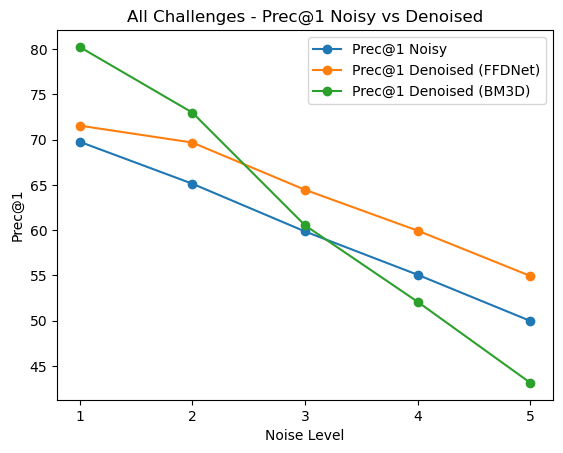

In [8]:
#all challenges
import matplotlib.pyplot as plt
import numpy as np

# Function to read the evaluation results from a file
def read_results(file_path, file):
    results = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()
            challenge_name = parts[0]
            
            # Skip 'ChallengeFree'
            if challenge_name == 'ChallengeFree':
                continue
            
            prec1 = float(parts[1])
            noise_level = int(challenge_name.split('-')[-1])
            
            if challenge_name.split('-')[0] not in results:
                results[challenge_name.split('-')[0]] = {'noise_level': [], 'prec1': []}
            
            results[challenge_name.split('-')[0]]['noise_level'].append(noise_level)
            results[challenge_name.split('-')[0]]['prec1'].append(prec1)
    
    return results

# Read results from both files
noisy_results = read_results('evaluation_results_cure_tsr\\evaluation_results_noisy.txt','noisy')
denoised_results = read_results('evaluation_results_cure_tsr\\evaluation_results_denoised_ffdnet.txt','denoised')
denoised_results_2 = read_results('evaluation_results_cure_tsr\\evaluation_results_denoised_bm3d.txt','denoised')

# Sort the lists for each challenge based on noise_level
for challenge, values in noisy_results.items():
    sorted_data = sorted(zip(values['noise_level'], values['prec1']), key=lambda x: x[0])
    values['noise_level'], values['prec1'] = zip(*sorted_data)

for challenge, values in denoised_results.items():
    sorted_data = sorted(zip(values['noise_level'], values['prec1']), key=lambda x: x[0])
    values['noise_level'], values['prec1'] = zip(*sorted_data)
    
for challenge, values in denoised_results_2.items():
    sorted_data = sorted(zip(values['noise_level'], values['prec1']), key=lambda x: x[0])
    values['noise_level'], values['prec1'] = zip(*sorted_data)

# Plotting
challenge_names = list(noisy_results.keys())

noisy_results_avg = np.zeros(5)
denoised_results_avg = np.zeros(5)
denoised_results_2_avg = np.zeros(5)

for challenge_name in challenge_names:
    if challenge_name == 'Decolorization':
        continue
    
    # Plot for Noisy
    noisy_results_avg += np.array(noisy_results[challenge_name]['prec1'])
    denoised_results_avg += np.array(denoised_results[challenge_name]['prec1'])
    denoised_results_2_avg += np.array(denoised_results_2[challenge_name]['prec1'])
    
noisy_results_avg /= 11
denoised_results_avg /= 11
denoised_results_2_avg /= 11

plt.figure()
plt.plot([1,2,3,4,5], noisy_results_avg,'o-', label='Prec@1 Noisy') 
plt.plot([1,2,3,4,5], denoised_results_avg,'o-', label='Prec@1 Denoised (FFDNet)')
plt.plot([1,2,3,4,5], denoised_results_2_avg,'o-', label='Prec@1 Denoised (BM3D)')
    
plt.title(f'All Challenges - Prec@1 Noisy vs Denoised')
plt.xlabel('Noise Level')
plt.ylabel('Prec@1')
    
plt.xticks(range(1, 6))
plt.legend()
    
plt.show()